In [1]:
# !pip install matplotlib
# !pip install numpy
# !pip install scipy
# %pip install

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
f = lambda x : (x - 1)**4 + x**2
res = minimize_scalar(f, method='brent')
print('x_min: %.02f, f(x_min): %.02f' % (res.x, res.fun))

x_min: 0.41, f(x_min): 0.29


In [14]:
def print_a_function(f, res):
    x = np.linspace(res.x - 1, res.x + 1, 100)
    y = [f(val) for val in x]
    plt.plot(x, y, color='blue', label='f')
    plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

    plt.grid()
    plt.legend(loc = 1)
    

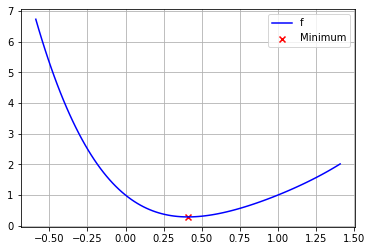

In [15]:

print_a_function(f, res)

In [16]:
# f = lambda x : (x - 1)**4 + x**2

def find_root_bisection(f, min, max):
    fa = f(min)
    fb = f(max) 
    if fa*fb > 0.01:
        print("f(min) and f(max) must have different signs.")
        return None
    
    for _ in range(100):
        c = (min + max)/2
        fc = f(c)
        
        if fc == 0.01:
            break
        
        if fa*fc > 0.01:
            min, fa = c, fc
            
        if fb*fc > 0.01:
            max, fb = c, fc
            
    return c


In [17]:
find_root_bisection(f, 0, 4)

f(min) and f(max) must have different signs.


In [18]:
f_deriv = lambda x: 2*x
func = lambda x:x**2 -5

def find_root_newton_raphson(func, f_deriv, x0):
    if abs(func(x0)) < 1e-6:
        return x0
    else:
        return find_root_newton_raphson(func, f_deriv, x0 - func(x0) / f_deriv(x0))

In [19]:
find_root_newton_raphson(func,f_deriv, 3)

2.236067977499978

In [20]:
def gradient_descent(f,f_prime,start,learning_rate):
    x_0 = start
    x_1 = x_0 - learning_rate*f_prime(x_0)
    precision = 0.0001
    iter = 0
    while abs(x_1 - x_0) >= precision:
        x_0 = x_1
        x_1 = x_0 - learning_rate*f_prime(x_0)
    return x_1

In [21]:
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print("xmin: %0.2f, f(x_min): %0.2f" % (x_min, f_min))

xmin: 0.41, f(x_min): 0.29


In [22]:
def solve_linear_problem(A, b, c):
    from scipy.optimize import linprog
    x0_bounds = (0, None)
    x1_bounds = (0, None)
    res = linprog(c, A_ub=A, b_ub=b,  bounds=(x0_bounds, x1_bounds), method='simplex', options={"disp": True})
    return res.fun,res.x

A = np.array([[2,1],[-4,5],[1,-2]])
b = np.array([10,8,3])
c = np.array([-1,-2])

optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print(f"Optimal value: {optimal_value}\n\n x is reached = {optimal_arg}")

Optimization terminated successfully.
         Current function value: -11.000000  
         Iterations: 3
Optimal value: -11.0

 x is reached = [3. 4.]
